In [2]:
import numpy as np
import pandas as pd
from mass_density_tools import get_mass_density_stellar_halo_inputs, plot_mass_density_slope_histogram, compute_mass_density_histogram

In [3]:
star_positions, star_masses, tree, GroupPos, R200Crit, M200Crit = get_mass_density_stellar_halo_inputs(
                                                                            basePath='sims.TNG.nosync/TNG100-3/output',
                                                                            SnapNum=99,
                                                                            PartNum=4)

In [4]:
slope_list = []
total_mass = []
stellar_mass = []
dr = 0.02
r_min_log = 0

for i in range(GroupPos.shape[0]):
    if M200Crit[i]<10**12:
        continue
    else:
        r_max_log=np.log10(R200Crit[i])
        center=GroupPos[i]
    
        log_masses, bins, slope, intercept, total_star_mass = compute_mass_density_histogram(star_positions, star_masses, tree, r_min_log, r_max_log, dr, center)
    
        slope_list.append(slope)
        total_mass.append(M200Crit[i])
        stellar_mass.append(total_star_mass)

df = pd.DataFrame({
    'slope':slope_list,
    'halo_mass':np.log10(total_mass),
    'stellar_mass':np.log10(stellar_mass)
}).dropna(thresh=2)

/Users/omaxim/Documents/GitHub/Heidelberg/Code/mass_density_tools.py:82: RuntimeWarning: divide by zero encountered in log10
  log_mass_densities = np.log10(mass_density)


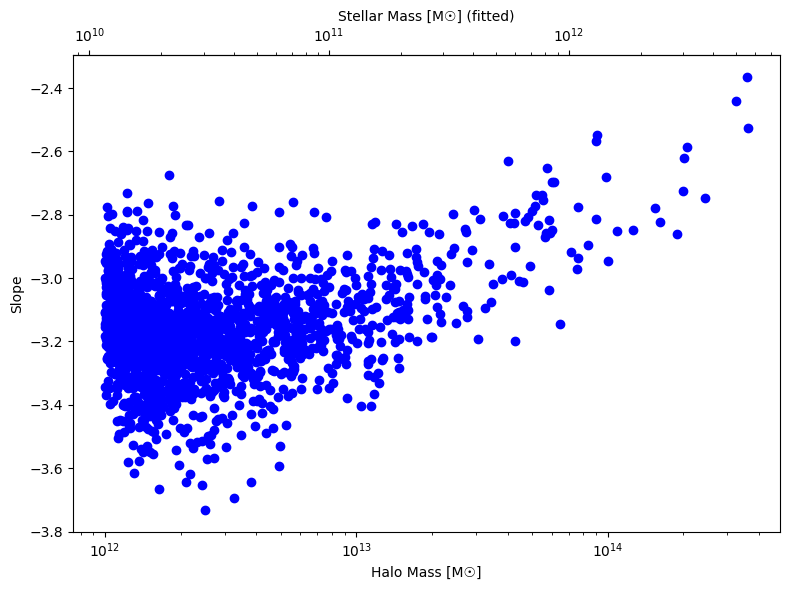

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for halo_mass >= 1e12 (since you're working in linear mass units)
plot_df = df[df.halo_mass >= 12].copy()
plot_df.halo_mass = 10**plot_df.halo_mass

# Fit a linear model in log-log space
slope, intercept, *_ = linregress(np.log10(plot_df['halo_mass']), np.log10(plot_df['stellar_mass']))

# Define forward and inverse mapping using the log-log linear relationship
def halo_to_stellar(hm):
    return 10**10**(slope * np.log10(hm) + intercept)

def stellar_to_halo(sm):
    return 10**((np.log10(sm) - intercept) / slope)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(plot_df['halo_mass'], plot_df['slope'], color='blue')
ax.set_xscale('log')
ax.set_xlabel('Halo Mass [M☉]')
ax.set_ylabel('Slope')

# Top axis in log scale using the power-law fit
secax = ax.secondary_xaxis('top', functions=(halo_to_stellar, stellar_to_halo))
secax.set_xscale('log')
secax.set_xlabel('Stellar Mass [M☉] (fitted)')

plt.tight_layout()
plt.show()


In [37]:
print(halo_to_stellar(10e13))

12.09052071825754


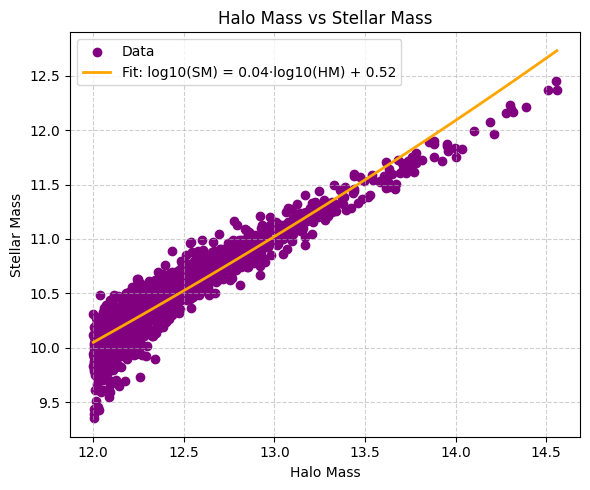

In [30]:
# Define the fitted line
halo_vals = np.linspace(df['halo_mass'].min(), df['halo_mass'].max(), 100)
stellar_fit = slope * halo_vals + intercept

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(df['halo_mass'], df['stellar_mass'], color='purple', label='Data')
plt.plot(halo_vals, 10**stellar_fit, color='orange', linewidth=2, label=f'Fit: log10(SM) = {slope:.2f}·log10(HM) + {intercept:.2f}')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Stellar Mass')
plt.title('Halo Mass vs Stellar Mass')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# function which returns binned quantities get_binned_x_vs_y(arratx,arrayy, bin_decision) -> 
# Median binning!